# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Riedho Syahwidi
- **Email:** m015d4ky2932@bangkit.academy
- **ID Dicoding:** riedho_syahwidi_5HT9

## Menentukan Pertanyaan Bisnis

- Apa pengaruh cuaca terhadap jumlah pengguna sepeda?
- Bagaimana pola peminjaman sepeda dalam sehari?
- Bagaimana pola peminjaman sepeda setiap hari dalam seminggu?
- Pada musim apa peminjaman sepeda paling tinggi?
- Bagaimana perbandingan tren penggunaan sepeda dalam setahun pada tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar


# DATA WRANGLING

## Gathering the data

### Show the data head

In [419]:
hour_df = pd.read_csv("C:/Users/LENOVO/proyek_analisis_data/Bike-sharing-dataset/hour.csv")
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [420]:
day_df = pd.read_csv("C:/Users/LENOVO/proyek_analisis_data/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Assessing the data

### Assessing hour dataset

1. Mengecek tipe data hour

In [421]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Mengecek apakah ada missing value

In [422]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3. Mengecek duplikasi

In [423]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


4. Mengecek apakah ada keanehan pada nilai statistiknya

In [424]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Assessing day dataset

1. Mengecek tipe data day

In [425]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. Mengecek missing value

In [426]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3. Mengecek duplikasi

In [427]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


4. Mengecek summary

In [428]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Cleaning the dataset

1. Konversi tipe data 'dteday'

In [429]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [430]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. Memperbaiki nilai pada variabel hari, bulan, dan musim

- Memperbaiki variabel hari

In [431]:
hour_df['weekday'] = hour_df['dteday'].dt.day_name()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [432]:
day_df['weekday'] = day_df['dteday'].dt.day_name()
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Memperbaiki variabel bulan

In [433]:
hour_df['mnth'] = hour_df['dteday'].dt.month_name()
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [434]:
day_df['mnth'] = day_df['dteday'].dt.month_name()
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


- Memperbaiki variabel musim

In [435]:
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in hour_df['season']:
    season = find_season(season)
    season_list.append(season)
    
hour_df['season'] = season_list
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [436]:
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in day_df['season']:
    season = find_season(season)
    season_list.append(season)
    
day_df['season'] = season_list
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


3. Memperbaiki value pada column 'yr'

In [437]:
hour_df['yr'] = hour_df['dteday'].dt.year
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [438]:
day_df['yr'] = day_df['dteday'].dt.year
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


4. Mengubah value pada weathersit agar lebih mudah dipahami

In [439]:
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [440]:
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,January,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,January,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [441]:
# Save csv untuk memudahkan proses selanjutnya
hour_df.to_csv("C:/Users/LENOVO/proyek_analisis_data/Bike-sharing-dataset/cleaned_bikeshare_hour.csv", index=False)

# EXPLORATORY DATA ANALYSIS

## Eksploratori data hanya menggunakan hours_df

Disini hanya menggunakan hour_df dikarenakan data pada day tidak terlalu berbeda dengan data hour

1. Rangkuman parameter statistik

In [442]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,NaN,May,NaN,NaN,Saturday,NaN,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


2. Histogram dan Boxplot 'cnt' pengguna sepeda

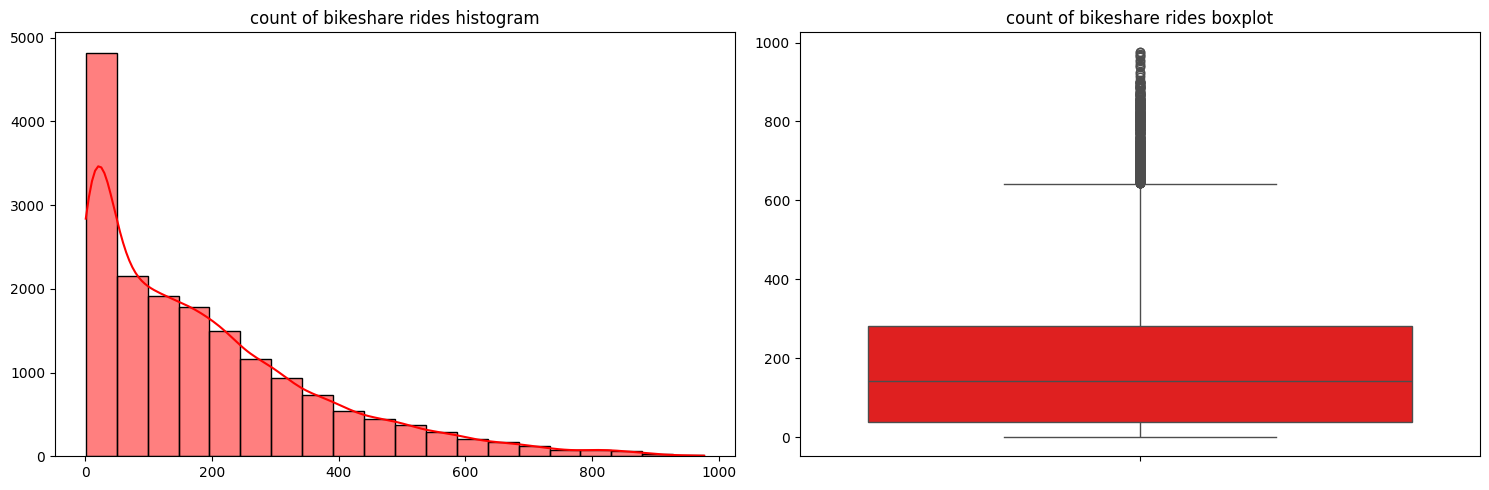

In [443]:
# Create a figure and 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(hour_df['cnt'], kde=True, bins=20, ax = axs[0], color='red')
axs[0].set_title("count of bikeshare rides histogram")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

sns.boxplot(y=hour_df['cnt'], ax = axs[1], color='red')
axs[1].set_title("count of bikeshare rides boxplot")
axs[1].set_xlabel("")
axs[1].set_ylabel("")


# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

Dapat dilihat histogram bahwa column pengguna sepeda secara keseluruhan adalah right-skewed

3. Jumlah pengguna sepeda 'register' dan 'casual'

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9512\2704093747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=["red", "lightcoral"])


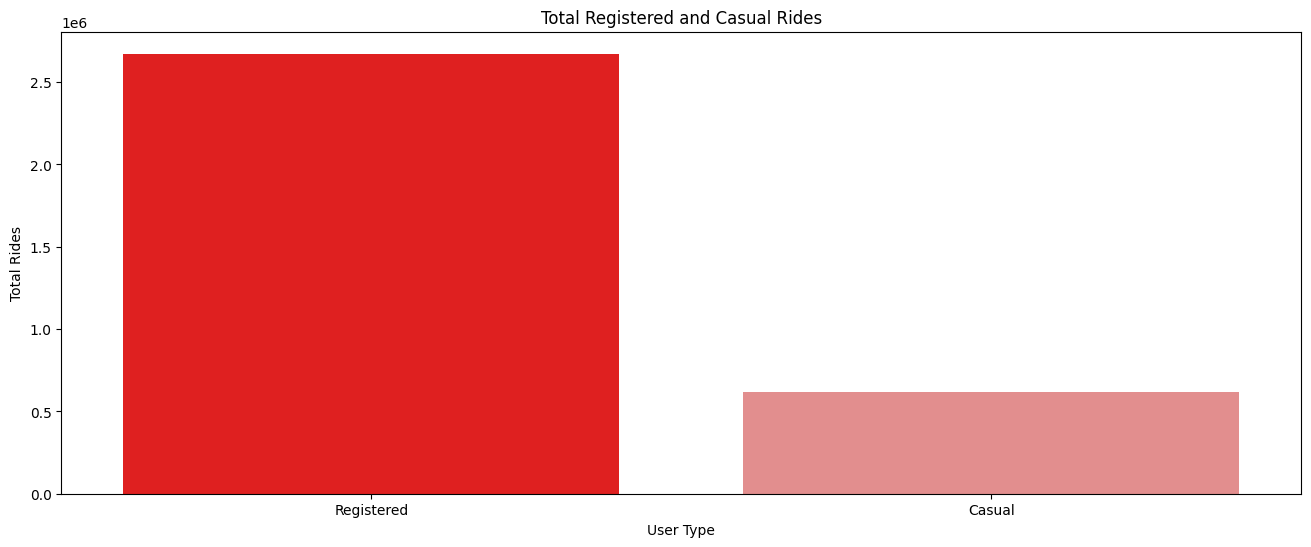

Count of registered users: 2672662
Count of casual users: 620017


In [444]:
registered_sum = hour_df['registered'].sum()
casual_sum = hour_df['casual'].sum()

plt.figure(figsize=(16,6))

# Create a bar chart using the plt.bar() function
sns.barplot(x=["Registered", "Casual"], y=[registered_sum, casual_sum],  palette=["red", "lightcoral"])

# Add labels and a title to the plot
plt.xlabel("User Type")
plt.ylabel("Total Rides")
plt.title("Total Registered and Casual Rides")

# Show the plot
plt.show()

print(f"Count of registered users: {registered_sum}")
print(f"Count of casual users: {casual_sum}")

Jumlah pengguna yang terdaftar lebih banyak daripada yang kasual

4. Pivot table pengguna sepeda berdasarkan 'weathersit'

In [445]:
hour_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
}).sort_values(by=('cnt', 'sum'), ascending = False)

cnt                         
                     max min        mean      sum
weathersit                                       
Clear/Partly Cloudy  977   1  204.869272  2338173
Mist/Cloudy          957   1  175.165493   795952
Light Snow/Rain      891   1  111.579281   158331
Severe Weather       164  23   74.333333      223

Secara keseluruhan pada cuaca Clear peminjaman sepeda paling banyak, dan pada Severe Weather peminjaman sepeda paling sedikit

5. Boxplot pengguna sepeda berdasarkan jam

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9512\1312615435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9512\1312615435.py:4: UserWarning: 
The palette list has fewer values (2) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


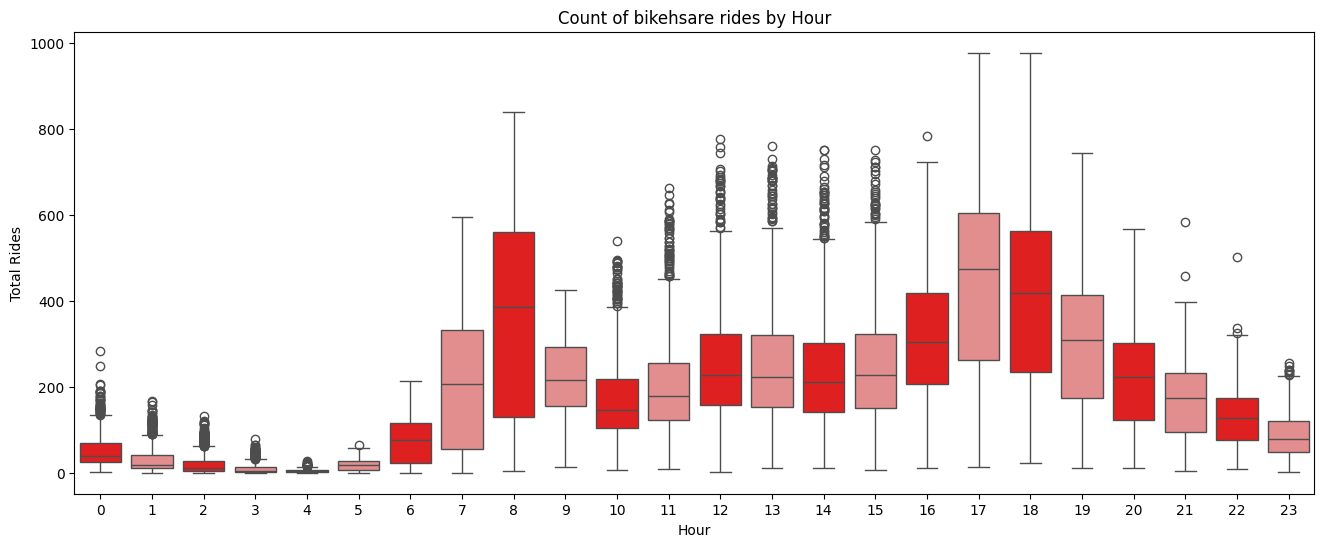

In [446]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="hr",
    y="cnt",
    data=hour_df,
    palette=["red", "lightcoral"]
)

# Add labels and a title to the plot
plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Hour")

# Show the plot
plt.show()

Dengan menggunakan dataset hour, kita dapat melihat total peminjaman sepeda berdasarkan jam secara keseluruhan

6. Pengguna sepeda berdasarkan hari

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9512\3825730074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9512\3825730074.py:5: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


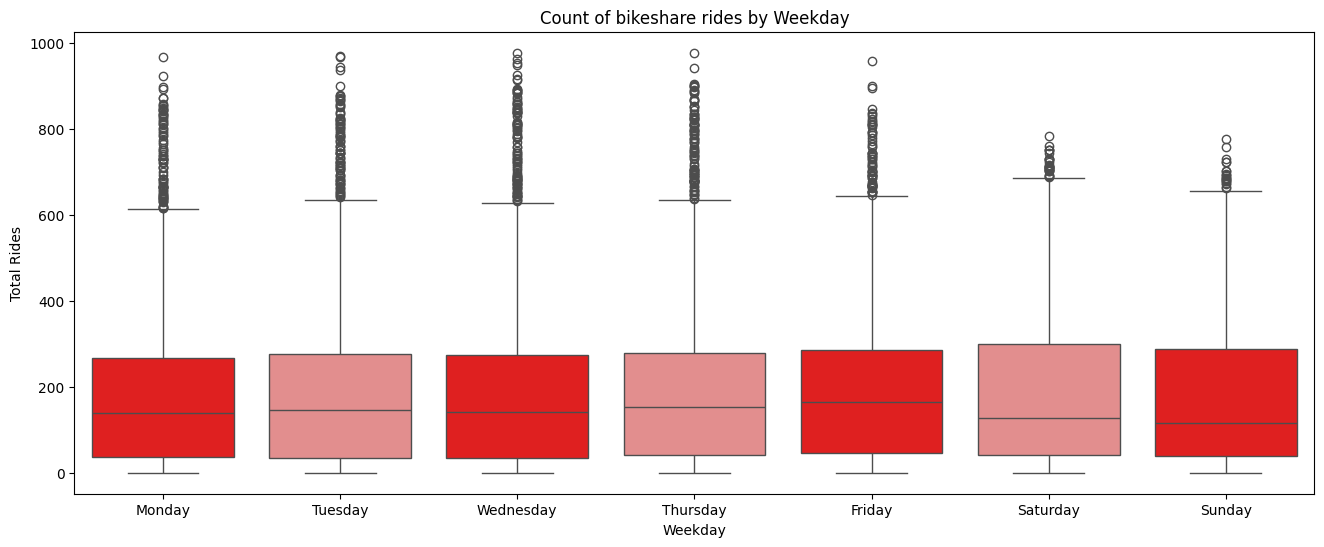

In [447]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="weekday",
    y="cnt",
    data=hour_df,
    palette=["red", "lightcoral"],
    order=day_order
)

# Add labels and a title to the plot
plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

# Show the plot
plt.show()

- Total peminjaman sepeda setiap harinya selama seminggu secara keseluruhan tidak jauh berbeda.
- Outlier paling sedikit berada pada hari sabtu dan minggu

7. Pivot table pengguna sepeda berdasarkan musim

In [448]:
hour_df.groupby(by='season').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['max', 'min', 'mean', 'sum']
}).sort_values(by=('cnt', 'sum'), ascending = False)


casual registered  cnt                         
           sum        sum  max min        mean      sum
season                                                 
Summer  226091     835038  977   1  236.016237  1061129
Spring  203522     715067  957   1  208.344069   918589
Fall    129782     711831  967   1  198.868856   841613
Winter   60622     410726  801   1  111.114569   471348

Peminjaman sepeda paling berdasarkan musim paling banyak ada pada Summer diikuti oleh Spring

8. Correlation and correlation heat map

In [449]:
hour_df.corr(numeric_only=True)

,instant,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,-0.004775,0.014723,-0.003416,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,-0.003867,0.006692,-0.002196,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hr,-0.004775,-0.003867,1.000000,0.000479,0.002285,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.006692,0.000479,1.000000,-0.252471,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,-0.003416,-0.002196,0.002285,-0.252471,1.000000,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
temp,0.136178,0.040913,0.137603,-0.027340,0.055390,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.133750,-0.030973,0.054667,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.083546,-0.276498,-0.010588,0.015688,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.003988,-0.011830,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.142779,0.301202,0.031564,-0.300942,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564


<Axes: >

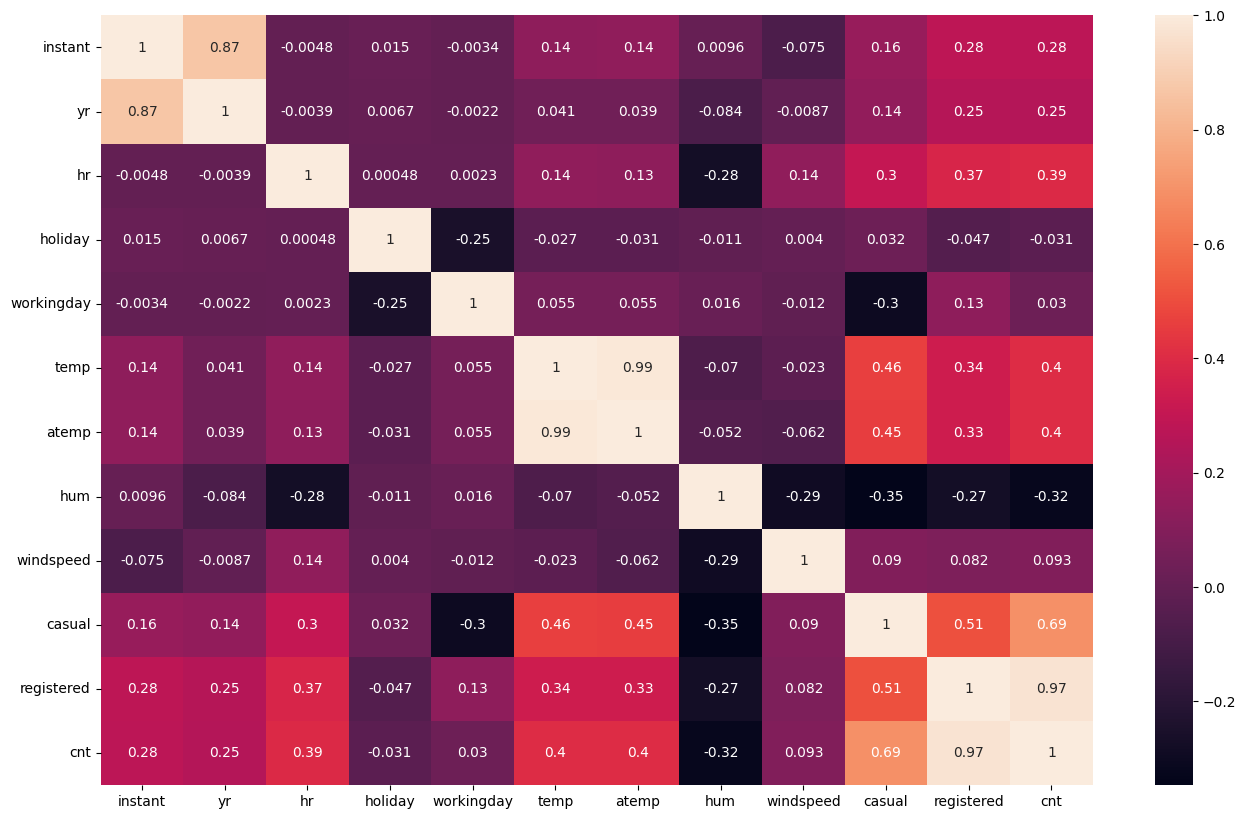

In [450]:
plt.figure(figsize=(16, 10))
sns.heatmap(hour_df.corr(numeric_only=True), annot=True)

- Ada korelasi yang kuat pada variabel casual dan register vs count pengguna sepeda karena dapat diketahui bahwa kenaikan jumlah casual dan register akan memengaruhi total (cnt) keseluruhan pengguna sepeda
- Ada korelasi sedang pada hr, temp, dan atemp vs cnt pengguna sepeda

# DATA VISUALIZATION

Saatnya menjawab pertanyaan yang dibuatkan sebelumnya:
- Apa pengaruh cuaca terhadap jumlah pengguna sepeda?
- Bagaimana pola peminjaman sepeda dalam sehari?
- Bagaimana pola peminjaman sepeda setiap hari dalam seminggu?
- Pada musim apa peminjaman sepeda paling tinggi?
- Bagaimana perbandingan tren penggunaan sepeda dalam setahun pada tahun 2011 dan 2012?

### 1. Apa pengaruh cuaca terhadap jumlah pengguna sepeda?

In [451]:
weather_user_df = hour_df.groupby(by='weathersit').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
weather_user_df

,casual,registered,cnt
weathersit,,,
Clear/Partly Cloudy,462745,1875428,2338173
Mist/Cloudy,134481,661471,795952
Light Snow/Rain,22783,135548,158331
Severe Weather,8,215,223


In [452]:
weather_user_df = weather_user_df.reset_index()
weather_user_df

,weathersit,casual,registered,cnt
0,Clear/Partly Cloudy,462745,1875428,2338173
1,Mist/Cloudy,134481,661471,795952
2,Light Snow/Rain,22783,135548,158331
3,Severe Weather,8,215,223


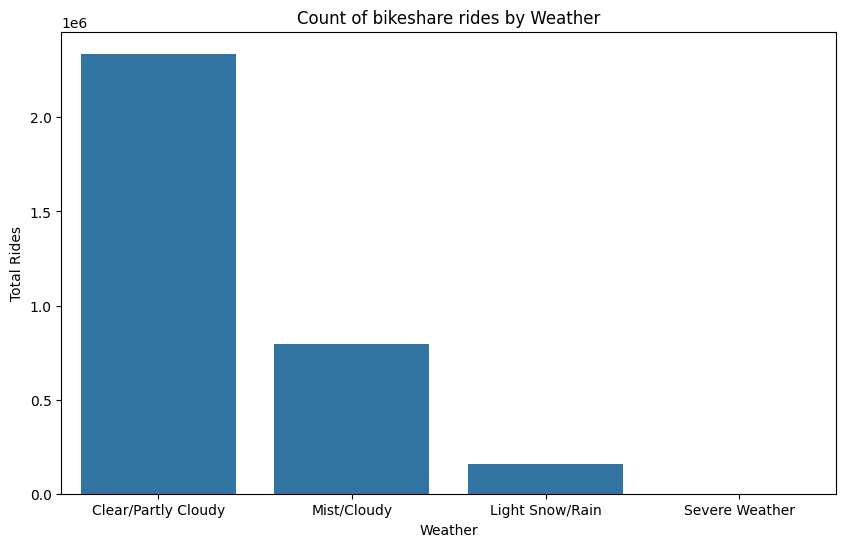

In [453]:
plt.figure(figsize=(10,6))

sns.barplot(x="weathersit", y="cnt", data=weather_user_df)

plt.xlabel("Weather")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weather")

plt.show()

#### Insight
- Jumlah total pengguna sepeda sangat terpengaruh oleh kondisi cuaca. Penggunaan ketika hujan dan cuaca buruk seperti badai berkurang secara signifikan.

### 2. Bagaimana pola peminjaman sepeda dalam sehari?

In [454]:
hourly_users_df = hour_df.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

hourly_users_df.head()

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428


In [455]:
hourly_users_df = hourly_users_df.reset_index()
hourly_users_df.head()

,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428


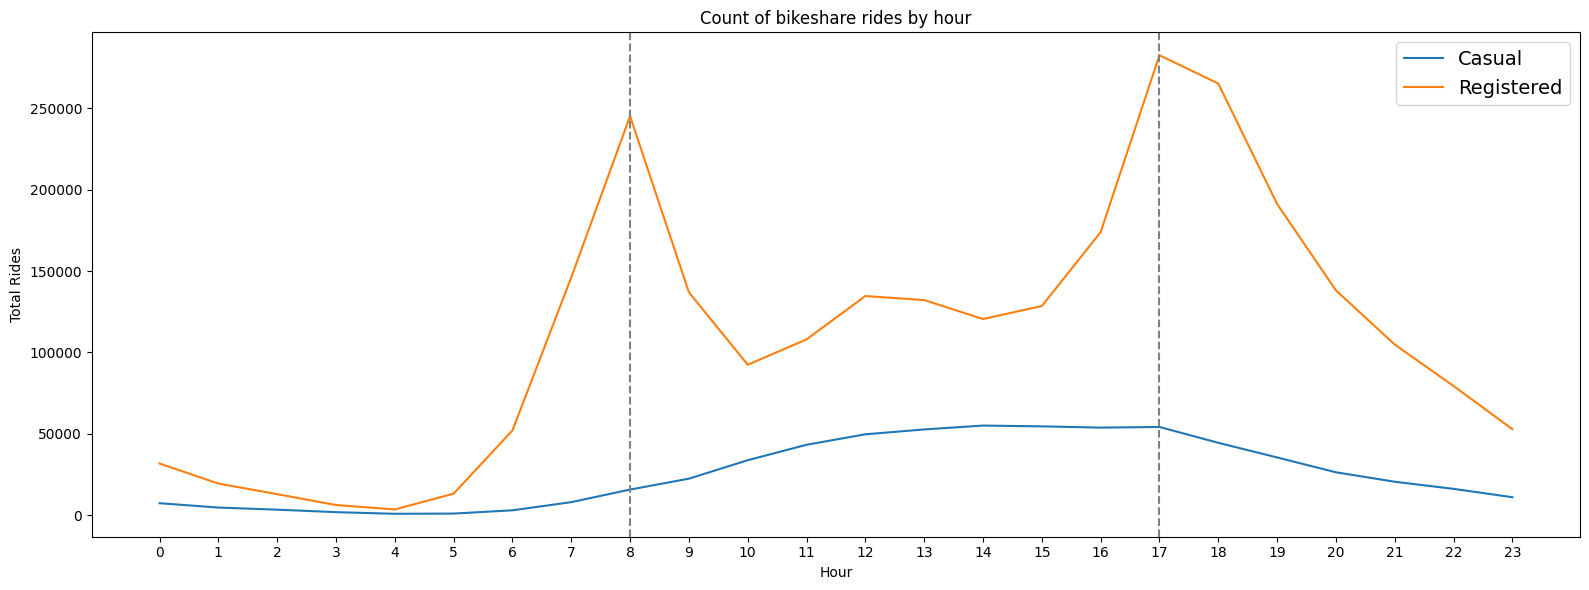

In [456]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="hr", y="casual", data=hourly_users_df, label='Casual')
sns.lineplot(x="hr", y="registered", data=hourly_users_df, label='Registered')

# Add labels and a title to the plot
x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by hour")

# highlight the important data label in the chart
plt.axvline(x=8, color='gray', linestyle='--')
plt.axvline(x=17, color='gray', linestyle='--')

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

#### Insight
- Terdapat perbedaan yang jelas antara pengguna register dan casual berdasarkan jam penggunaan
- Pengguna register menunjukkan nilai puncak pada pukul 8 dan 17 mengingat itu adalah jam sibuk berangkat dan pulang kerja, sangat memungkinkan pengguna register menggunakan sepeda untuk berpergian kerja
- Disisi lain pengguna casual meningkat di siang hari dan menunjukkan penurunan lewat pukul 17

### 3. Bagaimana pola peminjaman sepeda setiap hari dalam seminggu?

In [457]:
weekday_users_df = hour_df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weekday_users_df

,casual,registered,cnt
weekday,,,
Friday,78238,409552,487790
Monday,70784,384719,455503
Saturday,153852,323955,477807
Sunday,140521,303506,444027
Thursday,61460,423935,485395
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048


In [458]:
weekday_users_df = weekday_users_df.reset_index()
weekday_users_df

,weekday,casual,registered,cnt
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


In [459]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

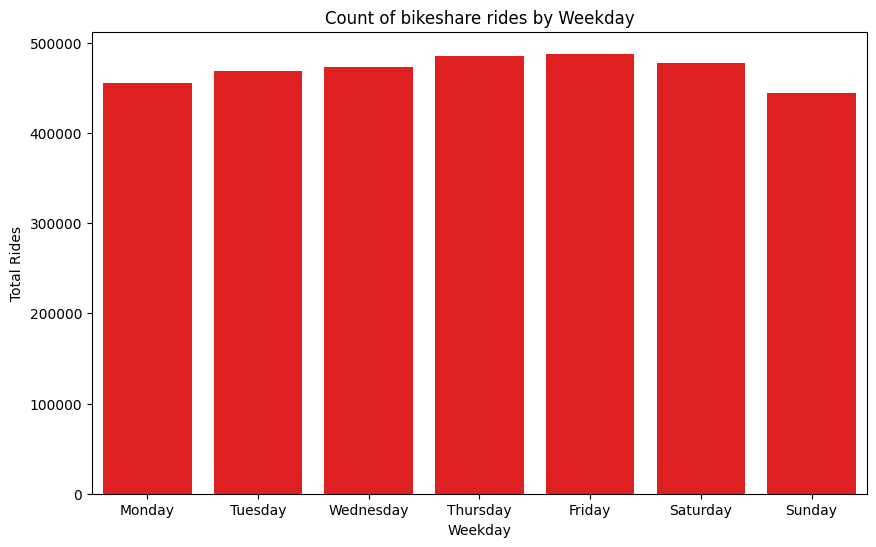

In [460]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='cnt', data=weekday_users_df, order=day_order, color='red')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

plt.show()

- Nampak seperti tidak ada perbedaan dalam jumlah pengguna sepeda dalam seminggu, mari kita pisahkan pengguna register dan casual untuk melihat perbedaannya.

In [461]:
weekday_users_df_unpivoted = pd.melt(weekday_users_df,
                                      id_vars=['weekday'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

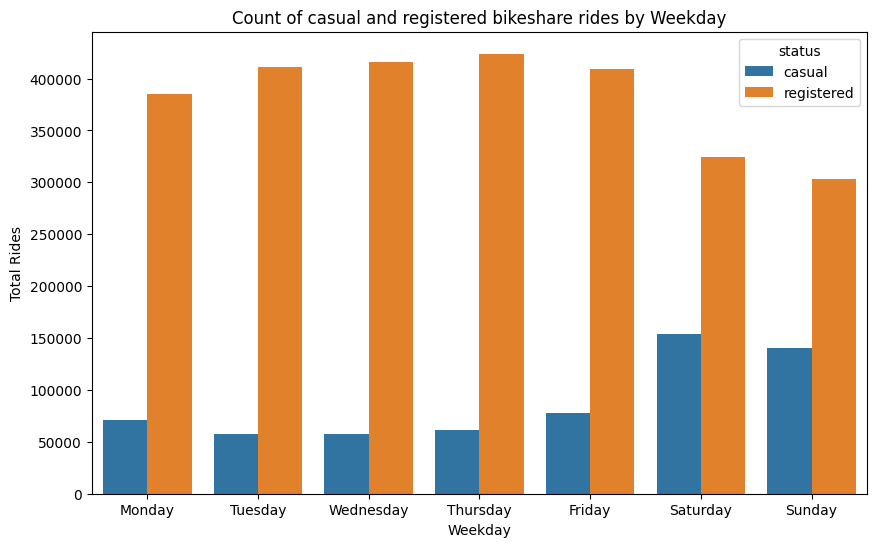

In [462]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='count', data=weekday_users_df_unpivoted, order=day_order, hue='status')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of casual and registered bikeshare rides by Weekday")

plt.show()

#### Insight
- Setelah kita memisahkan pengguna register dan casual, kita dapat melihat perbedaannya.
- Jumlah pengguna casual lebih banyak pada akhir pekan, sedangkan jumlah pengguna register lebih banyak pada hari kerja.
- Menguatkan insight pada penggunaan berdasarkan jam, hal ini semakin mendukung bahwa pengguna register mungkin menggunakan sepeda untuk berpergian secara rutin selama hari kerja, sedangkan pengguna casual menggunakan sepeda untuk bersantai di akhir pekan.

### 4. Pada musim apa peminjaman sepeda paling tinggi?

In [463]:
seasonly_users_df = hour_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df.head()

,casual,registered,cnt
season,,,
Fall,129782,711831,841613
Spring,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


In [464]:
seasonly_users_df = seasonly_users_df.reset_index()
seasonly_users_df

,season,casual,registered,cnt
0,Fall,129782,711831,841613
1,Spring,203522,715067,918589
2,Summer,226091,835038,1061129
3,Winter,60622,410726,471348


In [465]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9512\1386396613.py:5: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(x="season", y="cnt", data=seasonly_users_df, order=season_order, palette=custom_palette, hue='season')


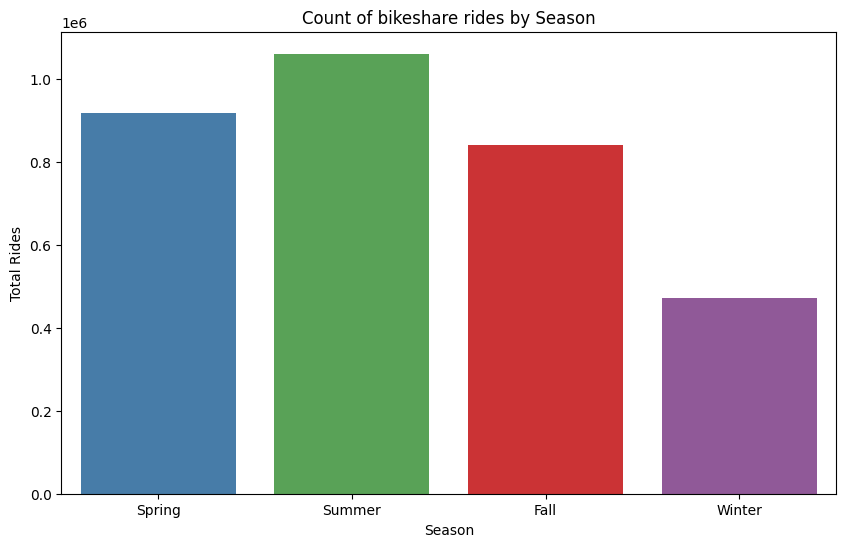

In [474]:
plt.figure(figsize=(10,6))

custom_palette = sns.color_palette("Set1")

sns.barplot(x="season", 
            y="cnt", 
            data=seasonly_users_df, 
            order=season_order, 
            palette=custom_palette, 
            hue='season')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

#### Insight
- Jumlah pengguna sepeda paling tinggi ada pada musim panas, diikuti oleh musim semi, dan paling rendah pada musim salju

### 5. Bagaimana perbandingan tren penggunaan sepeda dalam setahun pada tahun 2011 dan 2012?

In [478]:
hour_df['month'] = hour_df['dteday'].dt.month
hour_df['year'] = hour_df['dteday'].dt.year

In [480]:
monthly_users_df = hour_df.groupby(by=["month","year"]).agg({
    "cnt": "sum"
}).reset_index()

In [481]:
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

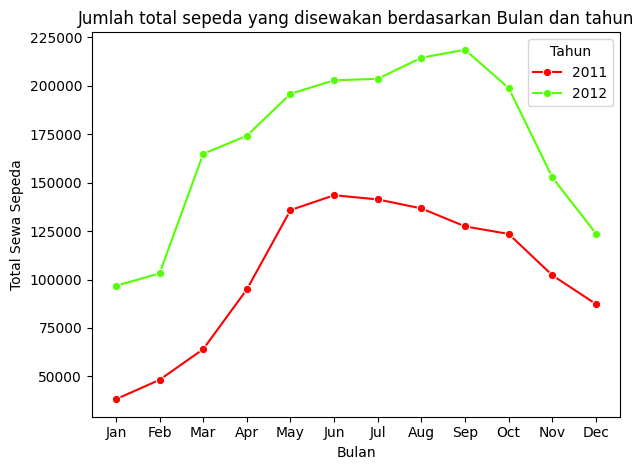

In [487]:
sns.lineplot(
    data=monthly_users_df,
    x="month",
    y="cnt",
    hue="year",
    palette="prism",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel("Bulan")
plt.ylabel("Total Sewa Sepeda")
plt.xticks(range(1, 13), month_labels)  # Set custom month labels
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

#### Insight
- Secara jumlah, pengguna sepeda pada tahun 2012 lebih besar daripada tahun 2011
- Puncak pengguna sepeda paling tinggi pada tahun 2011 berada di bulan Juni, sedangkan pada tahun 2012 berada di bulan September
- Dapat dilihat bahwa pengguna terendah pada bulan Januari, kemudian meningkat sepanjang tahun memasuki musim semi dan musim panas dan kembali mengalami penurunan yang signifikan pada bulan Oktober.

# CONCLUSION

### 1. Apa pengaruh cuaca terhadap jumlah pengguna sepeda?

> - Cuaca mempengaruhi jumlah pengguna sepeda secara signifikan. Jumlah pengguna sepeda jelas lebih tinggi ketika cuaca cerah/sedikit berawan. Penggunaan sepeda ketika hujan dan cuaca buruk seperti badai berkurang secara signifikan.

### 2. Bagaimana pola peminjaman sepeda dalam sehari?

> - Untuk pengguna register, peminjaman sepeda meningkat pada pukul 8 dan 17, ini menimbulkan asumsi bahwa pengguna register menggunakan sepeda untuk pergi bekerja.
> - Untuk pengguna casual, peminjaman meningkat di siang hari dan menurun memasuki sore hari pukul 17.

### 3. Bagaimana pola peminjaman sepeda setiap hari dalam seminggu?

> - Untuk pengguna register, jumlah peminjaman lebih tinggi pada hari kerja dibanding akhir pekan. Ini menguatkan asumsi sebelumnya bahwa pengguna register menggunakan sepeda untuk pergi bekerja.
> - Untuk pengguna casual, jumlah peminjaman lebih tinggi pada akhir pekan, menunjukkan bahwa mereka menggunakan sepeda untuk bersantai.

### 4. Pada musim apa peminjaman sepeda paling tinggi?

> - Peminjaman sepeda paling tinggi ada pada musim panas, dan terendah pada musim dingin.

### 5. Bagaimana perbandingan tren penggunaan sepeda dalam setahun pada tahun 2011 dan 2012?

> - Pengguna sepeda tahun 2012 lebih tinggi daripada tahun 2011. 
> - Keduanya menunjukkan tren musiman yang sama ketika jumlahnya meningkat di pertengahan tahun dan mengalami penurunan di awal dan akhir tahun.